In [3]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
from PIL import Image
from pytesseract import Output
import os
import glob
import pathlib
from colorthief import ColorThief

In [2]:
df_old = pd.read_csv("/home/lev/Desktop/output4.csv")

In [3]:
df_new = pd.read_csv("/home/lev/Desktop/output5.csv")

In [4]:
df_old = df_old.set_index('image')

In [5]:
df_new = df_new.set_index('image')

In [6]:
result = pd.concat(
    [df_old, df_new],
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [48]:
result = pd.read_csv("/home/lev/Desktop/result_1405.csv")

In [49]:
result = result.reset_index()

In [50]:
result = result.drop_duplicates(subset='image').reset_index()

In [51]:
result = result.drop(['index', 'Unnamed: 0', 'level_0'], axis=1)

In [52]:
result

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec,black_share
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333,4740962.0,14383481.0,9421528.0,0.0000
1,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667,15988470.0,1803916.0,15037526.0,0.0000
2,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667,13093332.0,1216945.0,8541521.0,0.0000
3,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667,16021224.0,3552847.0,15128547.0,0.0000
4,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667,333098.0,13486028.0,1881318.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,/home/lev/Desktop/diploma_local/nice_design/__...,54,22,19,17.934091,4.590909,"(23, 23, 24)","(226, 216, 189)","(135, 136, 140)",1,0.8956,6.696667,3.666667,1513240.0,14866621.0,8882316.0,0.0340
296,/home/lev/Desktop/diploma_local/nice_design/__...,76,13,9,11.434615,4.000000,"(27, 27, 32)","(200, 204, 205)","(112, 190, 223)",1,0.0231,6.456667,4.000000,1776416.0,13159629.0,7388895.0,0.1299
297,/home/lev/Desktop/diploma_local/nice_design/5a...,39,14,7,5.216154,3.615385,"(69, 32, 187)","(216, 126, 187)","(155, 149, 177)",1,0.0467,3.036667,2.666667,4530363.0,14188219.0,10196401.0,0.0000
298,/home/lev/Desktop/diploma_local/nice_design/ph...,34,8,0,1.178750,2.000000,"(227, 219, 216)","(30, 26, 25)","(206, 73, 78)",1,0.0042,6.596667,3.666667,14932952.0,1972761.0,13519182.0,0.0001


In [53]:
result['black_share'] = result['black_share'].fillna(0.00)

In [54]:
result

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec,black_share
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333,4740962.0,14383481.0,9421528.0,0.0000
1,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667,15988470.0,1803916.0,15037526.0,0.0000
2,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667,13093332.0,1216945.0,8541521.0,0.0000
3,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667,16021224.0,3552847.0,15128547.0,0.0000
4,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667,333098.0,13486028.0,1881318.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,/home/lev/Desktop/diploma_local/nice_design/__...,54,22,19,17.934091,4.590909,"(23, 23, 24)","(226, 216, 189)","(135, 136, 140)",1,0.8956,6.696667,3.666667,1513240.0,14866621.0,8882316.0,0.0340
296,/home/lev/Desktop/diploma_local/nice_design/__...,76,13,9,11.434615,4.000000,"(27, 27, 32)","(200, 204, 205)","(112, 190, 223)",1,0.0231,6.456667,4.000000,1776416.0,13159629.0,7388895.0,0.1299
297,/home/lev/Desktop/diploma_local/nice_design/5a...,39,14,7,5.216154,3.615385,"(69, 32, 187)","(216, 126, 187)","(155, 149, 177)",1,0.0467,3.036667,2.666667,4530363.0,14188219.0,10196401.0,0.0000
298,/home/lev/Desktop/diploma_local/nice_design/ph...,34,8,0,1.178750,2.000000,"(227, 219, 216)","(30, 26, 25)","(206, 73, 78)",1,0.0042,6.596667,3.666667,14932952.0,1972761.0,13519182.0,0.0001


In [55]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#разделение набора данных
df_total = result.dropna()
features = ['num_words', 'num_boxes', 'num_contrast_boxes', 'contrast_rate_text_mean',
         'contrast_mark_2_to_5_text_mean', 'contrast_rate_palette', 'contrast_mark_2_to_5_palette', 'white_share', 'black_share',
         'first_color_palette_dec', 'second_color_palette_dec', 'third_color_palette_dec']

y = df_total.target
X = df_total[features].copy()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42,stratify=y)


In [58]:
X_train

,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,contrast_rate_palette,contrast_mark_2_to_5_palette,white_share,black_share,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec
187,80,37,6,3.899459,2.486486,7.470000,4.000000,0.1128,0.0000,16180715.0,10950436.0,3481379.0
50,30,7,1,1.807143,2.285714,3.486667,3.000000,0.0252,0.0000,10720639.0,2302752.0,5978139.0
65,216,91,13,3.013077,2.428571,5.686667,3.333333,0.0023,0.0000,16119200.0,1199127.0,9135701.0
125,33,10,4,6.318000,3.200000,3.600000,3.000000,0.0407,0.0000,3091777.0,7590708.0,11830650.0
278,75,25,6,3.468400,2.640000,4.323333,3.333333,0.0399,0.1979,10986128.0,921362.0,6635379.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5,184,77,34,9.696364,3.324675,5.226667,3.666667,0.0030,0.0000,527127.0,12687766.0,8165825.0
128,52,28,5,2.708929,2.464286,6.323333,3.666667,0.0045,0.0000,1118479.0,13552325.0,8684676.0
222,39,8,7,13.012500,4.375000,7.453333,3.666667,0.7941,0.0000,14277082.0,328965.0,5789784.0
120,106,54,4,1.896296,2.203704,5.693333,3.333333,0.1622,0.0000,16174797.0,2500912.0,15360099.0


## Обучение Decision Tree

In [59]:
# масштабирование данных
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [60]:
X_train.isna().sum()

num_words                         0
num_boxes                         0
num_contrast_boxes                0
contrast_rate_text_mean           0
contrast_mark_2_to_5_text_mean    0
contrast_rate_palette             0
contrast_mark_2_to_5_palette      0
white_share                       0
black_share                       0
first_color_palette_dec           0
second_color_palette_dec          0
third_color_palette_dec           0
dtype: int64

In [61]:
# обучение модели
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=100)
clf.fit(X_train_scaled, y_train)
model = clf.fit(X_train_scaled, y_train)

#rfc.fit(X_train, y_train)

y_pred = clf.predict(X_test_scaled)
#preds_test = rfc.predict(X_test)

y_pred_proba = clf.predict_proba(X_test_scaled)

In [62]:
# Save predictions in suitable format
# reshape X_test сделать 
output = pd.DataFrame({'Id': X_test.index,
                       'target': y_pred})
output.set_index('Id')

,target
Id,
113,1
232,0
61,1
41,0
198,1
...,...
224,0
185,0
240,1


In [63]:
output

,Id,target
0,113,1
1,232,0
2,61,1
3,41,0
4,198,1
...,...,...
85,224,0
86,185,0
87,240,1
88,92,0


In [64]:
result = X_test.merge(output, how="inner", left_on=X_test.index, right_on="Id").merge(df_total['image'], how="inner", left_on="Id", right_on=df_total.index).set_index('Id')

In [65]:
result.head()

,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,contrast_rate_palette,contrast_mark_2_to_5_palette,white_share,black_share,first_color_palette_dec,second_color_palette_dec,third_color_palette_dec,target,image
Id,,,,,,,,,,,,,,
113,60,38,28,9.455000,3.710526,3.036667,2.666667,0.7107,0.0,10266291.0,3030358.0,6179910.0,1,/home/lev/Desktop/diploma_local/nice_design/00...
232,69,42,5,1.524762,2.119048,3.790000,2.666667,0.0632,0.0,10576306.0,15258345.0,5714857.0,0,/home/lev/Desktop/diploma_local/nice_design/00...
61,83,35,8,5.588857,2.685714,6.360000,3.333333,0.7475,0.0,14867403.0,1646633.0,8410952.0,1,/home/lev/Desktop/diploma_local/ugly_design/b8...
41,32,12,3,4.355833,2.666667,6.513333,3.666667,0.0000,0.0,920844.0,14669911.0,8490842.0,0,/home/lev/Desktop/diploma_local/ugly_design/d1...
198,40,8,1,1.838750,2.375000,4.666667,3.333333,0.6453,0.0,13947858.0,3618613.0,8412217.0,1,/home/lev/Desktop/diploma_local/nice_design/00...


Если нам интересно узнать о том, какие признаки являются самыми важными для RF-модели в деле предсказания рака груди, мы можем визуализировать и квантифицировать показатели важности признаков, обратившись к атрибуту feature_importances_:

## Метрики качества
http://bioinformaticsinstitute.ru/sites/default/files/vvedenie_v_mashinnoe_obuchenie.pdf

- confusion matrix
- ROC
- ROC AUC
- accuracy (аккуратность) — процент верных предсказаний
- recall  (полнота) — сколько из настоящих “Класс 1/да” мы
определили верно (то же самое, что True Positive Rate,
Sensitivity)
- precision (точность) сколько верных среди предсказанных как
“Класс 1/да”
- F-мера (гармоническое среднее P и R)

high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

In [66]:
# Analyzing the results. 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

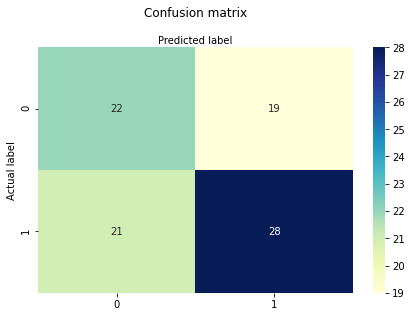

In [67]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5555555555555556
Recall: 0.5714285714285714
Precision: 0.5957446808510638
f1: 0.5833333333333334


In [69]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52        41
           1       0.60      0.57      0.58        49

    accuracy                           0.56        90
   macro avg       0.55      0.55      0.55        90
weighted avg       0.56      0.56      0.56        90



In [73]:
print("Average Precision Score", metrics.average_precision_score(y_test, y_pred))

Average Precision Score 0.573758865248227


In [71]:
metrics.precision_recall_curve(y_test, y_pred)

(array([0.54444444, 0.59574468, 1.        ]),
 array([1.        , 0.57142857, 0.        ]),
 array([0, 1]))

### Проверка Presicion / Recall с разным threshold

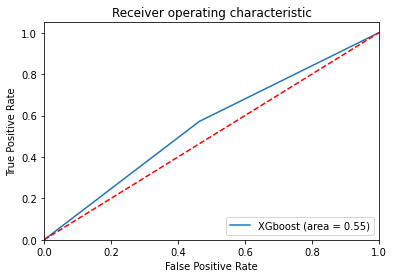

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGboost (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Feature Importance

In [41]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

feats = {}
#for feature, importance in zip(df_total.columns, rfc.feature_importances_):
for feature, importance in zip(features, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

NameError: name 'rfc' is not defined